# Part 1:

1) Give 1 real world example for:
   - Binary Classification Task
   - Multiclass Classification Task
   - Regression Task

Answer: 
1. Binary Classification Task - spam/not spam
2. Multiclass Classification Task - spam/not spam/important
3. Regression Task - predicting prices

2)
Classifying into 2 classes, a model produces the following outputs:


| $y_i$     |               $\hat{y_i}$                                  |
|---------|----------------------------------------------------------|
| 1       | 0.9 |
| 1       | 0.4 |
| 0       | 0.3 |
| 0       | 0.6 |

Calculate the binary cross-entropy loss.

In [ ]:
0.5736545

3) While improving a model complexity, if you notice that a model's training error is decreasing but the test error is getting higher, what does this indicate about the model's behavior?

Answer: model is overfitted

4. Suppose we have a dataset with categorical targets $Y = ${$1, ..., K$}. 

Let $n_k$ be the size of the $k$-th category :

$$
n_k = \sum_{i=1}^{n} \mathbb{I}[y_i = k], \quad \sum_{k=1}^{K} n_k = n.
$$

Consider a dummy model which always predicts category $l$, $1<l<K$. What is the value of the error rate ? For which $l$
 it is minimal?

Misclassification rate. The misclassification rate is minimal for the category(l) which appears the most frequently. 

5. The MSE for a constant model $f_\theta(x_i) = c$ is given by : 

$$
\frac{1}{n} \sum_{i=1}^{n} (y_i - c)^2.
$$

Find the constant $c$ that minimizes the MSE.

# Part 2:

### Step 1 : Generate synthetic data (Y) following any type of distributions.


array([11.05333419,  8.54529286,  6.21075208,  7.00950727,  7.88561789,
       11.89771574,  9.27208606,  8.8343527 ,  9.41907938,  9.86207271,
        8.35563419, 10.69088118, 10.30290679,  7.93337767, 12.24615482,
       11.14584517,  5.8023584 ,  9.70412644, 11.67686204, 12.8076724 ,
       11.72933711, 11.30601629, 12.56252503, 11.99824458,  8.38655481,
        7.72230836,  7.03815249,  7.66946317,  8.52541731, 13.36003248,
        9.3118672 , 11.97367254,  5.74252415, 10.39803257, 13.19800245,
       10.7523463 , 13.88019402,  4.34551533,  9.40093577,  9.20327076,
        9.65652824, 13.3365912 ,  9.25410852, 12.38615711, 11.78711385,
       10.50570944, 12.11538796,  7.84342457, 11.46473628,  6.84581982,
       11.8508254 , 10.89920255, 11.28879131,  9.39822845, 12.08794599,
        7.24448923,  5.64574127, 12.18634033, 15.23100606, 13.39266898,
       12.94823655,  8.24303189,  7.84276542, 13.0163768 , 10.86292792,
        5.94118664, 12.12029554,  5.95616467, 12.22197469, 11.75

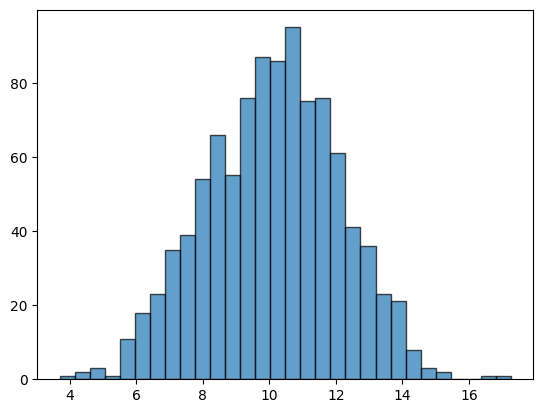

In [3]:
import numpy as np
import matplotlib.pyplot as plt

mean = 10
std = 2
n = 1000

Y = np.random.normal(loc=mean, scale=std, size=n)

plt.hist(Y, bins=30, edgecolor='black', alpha=0.7)


Y

### Step 2 : Define a function to compute MSE


In [4]:
import numpy as np
Y_pred = np.full_like(Y, 10)

Y_pred

array([10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10.,
       10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10.,
       10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10.,
       10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10.,
       10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10.,
       10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10.,
       10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10.,
       10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10.,
       10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10.,
       10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10.,
       10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10.,
       10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10.,
       10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10.,
       10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10

In [8]:
def compute_mse(Y, c):
    Y_pred = np.full_like(Y, c) # creates the array of size Y filled in with value c

    mse = np.mean((Y - Y_pred) ** 2)
    return mse


### Step 3 : Find the optimal c, compare it to the mean of you synthetic dataset


In [14]:
# formula from Step 1 #5 shows that optimal c is equal to the mean of Y
optimal_c = np.mean(Y)
optimal_c

np.float64(10.10719553114691)

In [9]:
# comparing

compute_mse(Y, optimal_c)

np.float64(4.046061025584105)

### Step 4 : Plot the MSE curve and the optimal c

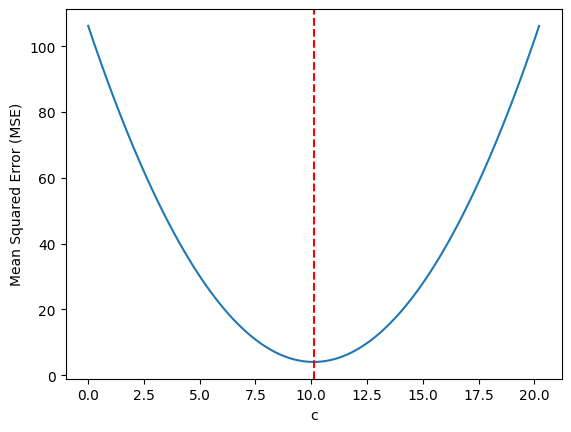

In [18]:
mean_Y = np.mean(Y)
c_values = np.linspace(0, 2*mean_Y, 100)
mse_values = [compute_mse(Y, c) for c in c_values]


plt.plot(c_values, mse_values, label="MSE Curve")

plt.xlabel('c')
plt.ylabel('Mean Squared Error (MSE)')
plt.axvline(x=mean_Y, color='r', linestyle='--', label=f"Optimal c (mean of Y): {mean_Y:.2f}")

# Part 3 : 

Write your own implementation of splitting the dataset on train and test using shuffling:

In [19]:
import numpy as np

In [20]:
def train_test_split(X, y, test_size=0.2):
    """
    Split the dataset into training and testing sets.

    Parameters:
    X (numpy array): The feature matrix.
    y (numpy array): The target labels.
    test_size (float): The proportion of the dataset to include in the test split.

    Returns:
    X_train (numpy array): The training feature matrix.
    X_test (numpy array): The testing feature matrix.
    y_train (numpy array): The training labels.
    y_test (numpy array): The testing labels.
    """

    X = np.array(X)
    y = np.array(y)

    n_indices = X.shape[0]

    permutated_indices = np.random.permutation(n_indices)

    n_test = int(test_size*n_indices)

    test_indices = permutated_indices[:n_test]
    train_indices = permutated_indices[n_test:]

    X_train, X_test = X[train_indices], X[test_indices]
    y_train, y_test = y[train_indices], y[test_indices]


    return X_train, X_test, y_train, y_test


# Example Usage
X = [[1, 2], [3, 4], [5, 6], [7, 8]]
y = [0, 1, 0, 1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

Run the following tests to ensure that your implementation works as expected. <br>
<strong>Don't modify the cells</strong>!

In [21]:
def test_basic_split():
    X = [[1, 2], [3, 4], [5, 6], [7, 8]]
    y = [0, 1, 0, 1]
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
    
    # Check if the correct number of samples is in the train and test sets
    assert len(X_train) == 3, f"Expected 3 training samples, got {len(X_train)}"
    assert len(X_test) == 1, f"Expected 1 test sample, got {len(X_test)}"
    assert len(y_train) == 3, f"Expected 3 training labels, got {len(y_train)}"
    assert len(y_test) == 1, f"Expected 1 test label, got {len(y_test)}"
    
    print("Basic split test passed.")

In [22]:
def test_empty_dataset():
    X = []
    y = []
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
    
    # Check if the splits are empty
    assert len(X_train) == 0, f"Expected 0 training samples, got {len(X_train)}"
    assert len(X_test) == 0, f"Expected 0 test samples, got {len(X_test)}"
    assert len(y_train) == 0, f"Expected 0 training labels, got {len(y_train)}"
    assert len(y_test) == 0, f"Expected 0 test labels, got {len(y_test)}"
    
    print("Empty dataset test passed.")

In [23]:
def test_different_test_size():
    X = [[1, 2], [3, 4], [5, 6], [7, 8]]
    y = [0, 1, 0, 1]
    
    # Test with 50% test size
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)
    assert len(X_test) == 2, f"Expected 2 test samples, got {len(X_test)}"
    
    # Test with 25% test size
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
    assert len(X_test) == 1, f"Expected 1 test sample, got {len(X_test)}"
    
    print("Different test_size values test passed.")

In [24]:
from sklearn.datasets import load_iris

data = load_iris()
X = data.data
y = data.target

def test_real_dataset():
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
    
    # Check the size of the train and test sets
    assert len(X_train) == 105, f"Expected 105 training samples, got {len(X_train)}"
    assert len(X_test) == 45, f"Expected 45 test samples, got {len(X_test)}"
    
    print("Real dataset test passed.")


In [25]:
def run_tests():
    test_basic_split()
    test_empty_dataset()
    test_different_test_size()
    test_real_dataset()

run_tests()

Basic split test passed.
Empty dataset test passed.
Different test_size values test passed.
Real dataset test passed.
